In [9]:
# !pip install --upgrade pandas-datareader

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

from pandas_datareader import data as pdr
#import fix_yahoo_finance as yf

#yf.pdr_override()

stock1 = "AAPL"
stock2 = "AMZN"
stock3 = "GE"
stock4 = "JPM"

start_date = "2010-06-01"
end_date = "2021-08-19"

pd1 = pdr.DataReader(stock1, "yahoo", start=start_date, end=end_date)

pd2 = pdr.DataReader(stock2, "yahoo", start=start_date, end=end_date)

pd3 = pdr.DataReader(stock3, "yahoo", start=start_date, end=end_date)

pd4 = pdr.DataReader(stock4, "yahoo", start=start_date, end=end_date)

In [10]:
pd4.tail(9)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-09,158.550003,155.899994,157.520004,157.330002,9516900.0,157.330002
2021-08-10,159.979996,156.309998,156.740005,159.259995,8667000.0,159.259995
2021-08-11,161.500000,159.080002,160.000000,161.160004,9156500.0,161.160004
2021-08-12,162.369995,160.550003,161.880005,161.789993,8844200.0,161.789993
2021-08-13,162.160004,159.570007,161.789993,159.979996,8980000.0,159.979996
2021-08-16,159.029999,156.779999,158.940002,158.929993,8755800.0,158.929993
2021-08-17,158.860001,155.270004,157.570007,157.009995,9347200.0,157.009995
2021-08-18,158.009995,155.339996,156.309998,155.580002,8065500.0,155.580002
2021-08-19,155.559998,153.009995,153.160004,154.279999,9517700.0,154.279999


In [11]:
pd1 = pd1.drop(columns=["High", "Low", "Open", "Close", "Volume"])
pd2 = pd2.drop(columns=["High", "Low", "Open", "Close", "Volume"])
pd3 = pd3.drop(columns=["High", "Low", "Open", "Close", "Volume"])
pd4 = pd4.drop(columns=["High", "Low", "Open", "Close", "Volume"])

pd1.head()

,Adj Close
Date,
2010-06-01,7.998320
2010-06-02,8.093994
2010-06-03,8.068543
2010-06-04,7.848980
2010-06-07,7.695044


In [13]:
for stock_df in (pd1, pd2, pd3, pd4):
  stock_df["Norm return"] = stock_df["Adj Close"] / stock_df.iloc[0]["Adj Close"] # normalized return

In [14]:
# assume portfolio contains 35% of stock1, 25% of stock2, 20% of stock3 and 20% of stock4
for stock_df, allocation in zip((pd1, pd2, pd3, pd4),[.35,.25,.2,.2]):
  stock_df["Allocation"] = stock_df["Norm return"] * allocation

In [15]:
# assume initial portfolio size is 10k
for stock_df in (pd1, pd2, pd3, pd4):
  stock_df["Position"] = stock_df["Allocation"]*10000

In [16]:
pd2.head()

,Adj Close,Norm return,Allocation,Position
Date,,,,
2010-06-01,123.239998,1.000000,0.250000,2500.000000
2010-06-02,126.309998,1.024911,0.256228,2562.276853
2010-06-03,128.759995,1.044791,0.261198,2611.976565
2010-06-04,122.769997,0.996186,0.249047,2490.465733
2010-06-07,122.010002,0.990020,0.247505,2475.048772


In [18]:
# Combine all positions to a single DataFrame
all_pos = [pd1["Position"], pd2["Position"], pd3["Position"], pd4["Position"]]
portf_val = pd.concat(all_pos, axis=1)
portf_val.columns = [f"{stock1} Pos",f"{stock2} Pos",f"{stock3} Pos",f"{stock4} Pos"]

In [19]:
# Sum of all positions
portf_val["Total Pos"] = portf_val.sum(axis=1)
portf_val.head()

,AAPL Pos,AMZN Pos,GE Pos,JPM Pos,Total Pos
Date,,,,,
2010-06-01,3500.000000,2500.000000,2000.000000,2000.000000,10000.000000
2010-06-02,3541.866394,2562.276853,2046.307269,2052.413236,10202.863752
2010-06-03,3530.729371,2611.976565,2058.822779,2029.061217,10230.589931
2010-06-04,3434.650374,2490.465733,1966.207407,1952.257274,9843.580787
2010-06-07,3367.288847,2475.048772,1928.660544,1905.552704,9676.550867


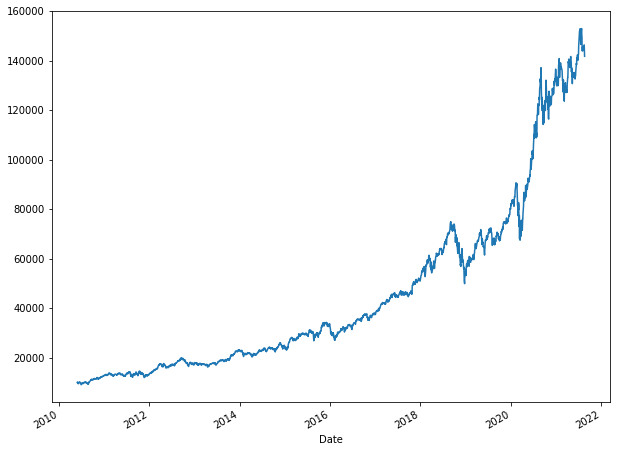

In [20]:
import matplotlib.pyplot as plt
portf_val["Total Pos"].plot(figsize=(10,8))

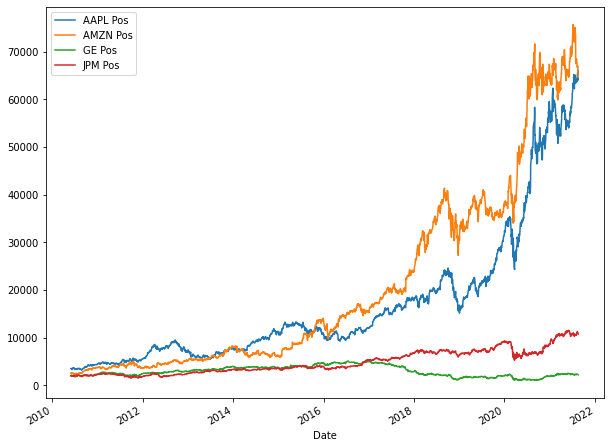

In [22]:
portf_val.drop("Total Pos", axis=1).plot(figsize=(10,8)) # Plot of individual stocks

In [24]:
cumulative_return = 100 * ( portf_val [ "Total Pos" ] [ -1 ] / portf_val [ "Total Pos" ] [ 0 ] -1)
print("Cumulative return was {:.2f}% ".format(cumulative_return))

Cumulative return was 1317.75% 


In [25]:
portf_val["Daily Return"] = portf_val["Total Pos"].pct_change(1) # Adding percentage change to DataFrame

In [27]:
Sharpe_Ratio = portf_val["Daily Return"].mean() / portf_val["Daily Return"].std() # Sharpe Ratio
Sharpe_Ratio

0.07262630843062125

In [28]:
# Annualised Sharpe Ratio
# Assuming 252 trading days in a year
A_Sharpe_Ratio = (252**0.5) * Sharpe_Ratio
A_Sharpe_Ratio

1.1529069044885851